<a href="https://colab.research.google.com/github/cyxCHENYUXUAN/clyginxiut/blob/Deep-Learning-And-Neural-Network/%E7%BA%BF%E6%80%A7%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.导入训练集和测试集

In [3]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.utils.data as data
import torch.nn as nn

In [4]:
X_train = pd.read_csv('X_train.csv').values
y_train = pd.read_csv('y_train.csv').values
X_test = pd.read_csv('X_test.csv').values
y_test = pd.read_csv('y_test.csv').values

# 2.定义DataLoader

## 2.1 将数据变为tensor

In [5]:
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

## 2.2 将x和y配对

In [6]:
dataset = TensorDataset(X_train, y_train)

## 2.3 按批量读取数据，设置batch_size

In [7]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# 3.定义线性回归模型

In [8]:
class LinearNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearNetwork, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

## 3.1 设置模型参数

输入四个特征，输出一个特征

In [9]:
model = LinearNetwork(4, 1)

## 3.2 设置损失函数

In [10]:
loss_func = nn.MSELoss()

## 3.3 设置SGD优化器

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 4.训练线性回归模型

## 4.1 训练过程

读取数据 → 计算损失 → 反向传播 → 更新参数 → 梯度清零

In [12]:
epochs = 50
for epoch in range(epochs):
  for X_batch, y_batch in data_loader:
      optimizer.zero_grad()
      loss = loss_func(model(X_batch), y_batch)
      loss.backward()
      optimizer.step()
  with torch.no_grad():
      loss_value = loss_func(model(X_train), y_train)
      print(loss_value,)

tensor(11.4712)
tensor(4.3079)
tensor(1.6912)
tensor(0.7350)
tensor(0.3836)
tensor(0.2558)
tensor(0.2083)
tensor(0.1911)
tensor(0.1846)
tensor(0.1824)
tensor(0.1816)
tensor(0.1813)
tensor(0.1812)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)
tensor(0.1811)


## 4.2 调整超参数

调整learning_rate,batch_size以及epoch来降低损失值

lr=0.01，batch_size=32，epochs=50时，结果如下

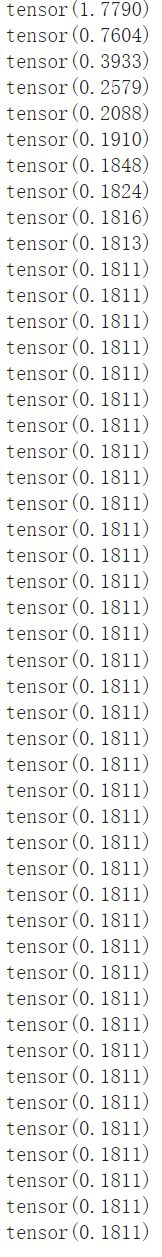

lr=0.001，batch_size=16，epochs=100时，结果如下

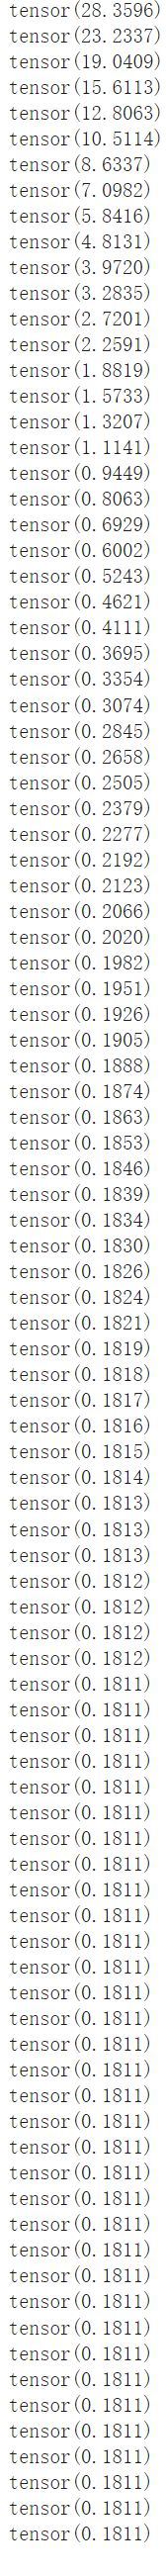

上面两次的参数训练之后得到的损失值均较小，训练效果好

lr=0.0001，batch_size=64，epochs=100时，结果如下

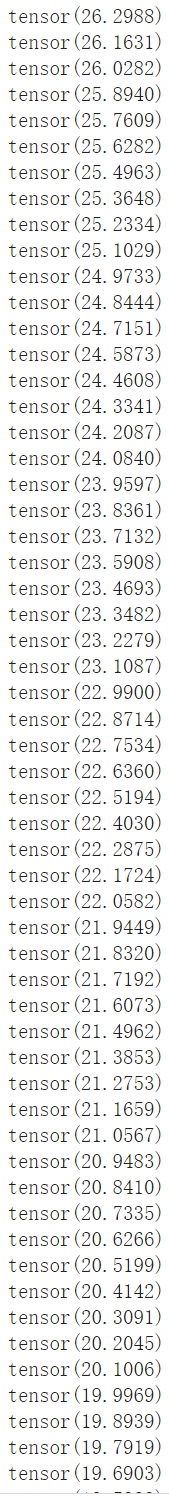

这次参数训练后得到的损失值较大，参数设置得不合理

最终综合评估，发现lr=0.01，batch_size=32，epochs=50时不仅迭代次数少，而且最终损失值较小，所以选用lr=0.01，batch_size=32，epochs=50为线性回归模型的超参数

## 4.3 评估模型

In [13]:
y_pred = model(X_test).round()#取整来进行比较

torch.sum(y_pred == y_test) / y_test.shape[0]#通过y_pred和y比较得到准确率

tensor(0.7700)

线性回归模型准确率为77.00%

# 5.定义线性分类模型

## 5.1 将标签类型转为Long型

In [14]:
y_train = torch.tensor(y_train, dtype=torch.long)

<ipython-input-14-c2810850b76f>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)


In [15]:
y_train.shape

torch.Size([800, 1])

In [16]:
y_train.dim()#观察y_train的维度

2

## 5.2 更新DataLoader

In [17]:
dataset = TensorDataset(X_train, y_train)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [18]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

## 5.3 设置模型参数

输入四个特征，标签的范围是0-9，共有10个类型

In [19]:
model_softmax = SoftmaxRegression(4, 10)

## 5.4 设置损失函数

In [20]:
loss_softmax = nn.CrossEntropyLoss()

## 5.5 设置SGD优化器

In [21]:
optimizer_softmax = torch.optim.SGD(model_softmax.parameters(), lr=0.1)

# 6.训练线性分类模型

## 6.1 训练过程

读取数据 → 计算损失 → 反向传播 → 更新参数 → 梯度清零

In [22]:
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in data_loader:
        y_batch = y_batch.squeeze().long()#将y_batch降为一维并且转为Long型
        optimizer_softmax.zero_grad()
        outputs = model_softmax(X_batch)
        loss = loss_softmax(outputs, y_batch)
        loss.backward()
        optimizer_softmax.step()
    with torch.no_grad():
      y_train = y_train.squeeze().long()#将y_train降为一维并且转为Long型
      loss_value = loss_softmax(model_softmax(X_train), y_train)
      print(loss_value,)

tensor(1.6766)
tensor(1.3824)
tensor(1.2240)
tensor(1.1249)
tensor(1.0577)
tensor(1.0095)
tensor(0.9731)
tensor(0.9445)
tensor(0.9215)
tensor(0.9024)
tensor(0.8863)
tensor(0.8722)
tensor(0.8600)
tensor(0.8491)
tensor(0.8393)
tensor(0.8304)
tensor(0.8224)
tensor(0.8150)
tensor(0.8080)
tensor(0.8015)
tensor(0.7954)
tensor(0.7897)
tensor(0.7843)
tensor(0.7793)
tensor(0.7743)
tensor(0.7697)
tensor(0.7653)
tensor(0.7611)
tensor(0.7570)
tensor(0.7531)
tensor(0.7493)
tensor(0.7457)
tensor(0.7423)
tensor(0.7389)
tensor(0.7357)
tensor(0.7327)
tensor(0.7297)
tensor(0.7267)
tensor(0.7240)
tensor(0.7212)
tensor(0.7186)
tensor(0.7160)
tensor(0.7136)
tensor(0.7112)
tensor(0.7089)
tensor(0.7067)
tensor(0.7045)
tensor(0.7024)
tensor(0.7003)
tensor(0.6984)
tensor(0.6963)
tensor(0.6944)
tensor(0.6926)
tensor(0.6908)
tensor(0.6890)
tensor(0.6873)
tensor(0.6857)
tensor(0.6841)
tensor(0.6825)
tensor(0.6810)
tensor(0.6795)
tensor(0.6780)
tensor(0.6766)
tensor(0.6752)
tensor(0.6738)
tensor(0.6725)
tensor(0.6

## 6.2 调整超参数

调整learning_rate,batch_size以及epoch来降低损失值

lr=0.1，batch_size=32，epochs=100时，结果如下

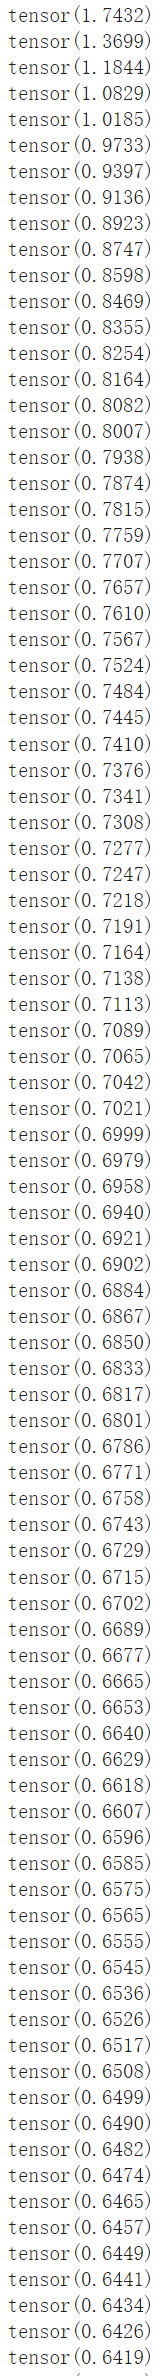

发现在这个参数训练下最终得到的损失值较小，准确率高

lr=0.001，batch_size=16，epochs=100时，结果如下

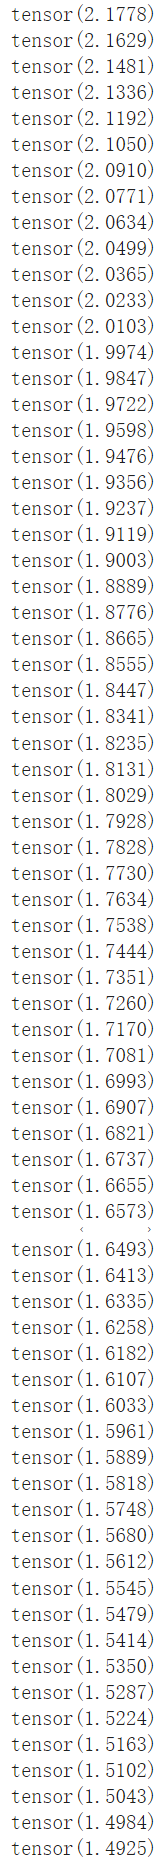

最终损失值只能降到1.5左右，损失值仍然较大，效果不好

lr=0.01，batch_size=32，epochs=50时，结果如下

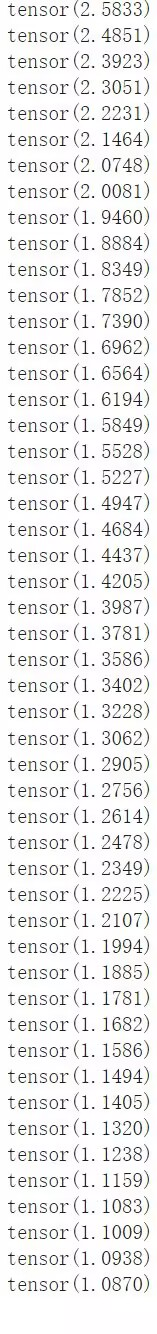

最终损失值能够降低到1左右，在三次调整的参数的结果里面适中

最终综合评估，发现lr=0.1，batch_size=32，epochs=100时，最终损失值较小，所以选用lr=0.1，batch_size=32，epochs=100为线性回归模型的超参数

## 6.3 评估模型

### 6.3.1 处理y_pred

In [23]:
y_pred = model_softmax(X_test)

y_pred

tensor([[-1.2358, -1.8952, -1.3817,  ..., -3.2892, -3.6759, -1.2917],
        [-1.7371, -1.2282, -1.6105,  ...,  7.1691,  5.2238, -1.2952],
        [-1.1322, -2.0043, -1.2413,  ..., -5.7624, -5.6397, -1.2747],
        ...,
        [-1.3249, -2.1510, -1.5522,  ..., -8.4675, -7.6117, -1.5973],
        [-1.4473, -1.8390, -2.1852,  ..., -0.6974, -0.5815, -1.5906],
        [-1.5485, -1.7106, -1.6334,  ..., -1.0073, -1.4145, -1.4877]],
       grad_fn=<AddmmBackward0>)

得到每一行的最大值对应的索引，这就是最终要得到的y_pred

In [24]:
_, y_pred = torch.max(y_pred, dim=1)

print(y_pred)

tensor([5, 7, 4, 6, 6, 5, 5, 4, 6, 5, 5, 4, 4, 6, 5, 6, 5, 6, 5, 4, 5, 5, 5, 6,
        5, 6, 5, 6, 5, 6, 5, 4, 5, 6, 6, 6, 7, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5,
        4, 5, 6, 4, 6, 4, 5, 7, 5, 5, 6, 7, 6, 4, 5, 4, 5, 4, 5, 5, 6, 6, 6, 5,
        6, 6, 6, 5, 6, 6, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 4, 6,
        6, 4, 4, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 4, 6, 5, 6, 5, 5, 6, 6, 4, 6,
        4, 6, 7, 6, 6, 5, 6, 5, 7, 6, 6, 4, 5, 6, 6, 6, 7, 5, 4, 6, 5, 5, 6, 5,
        6, 4, 5, 4, 5, 6, 4, 5, 4, 5, 5, 5, 4, 6, 5, 7, 6, 4, 5, 6, 6, 6, 5, 6,
        6, 4, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 7, 5, 6, 7, 6, 7, 5, 6, 6, 5, 6, 5,
        6, 6, 5, 6, 5, 4, 5, 5])


将一维的y_pred变为二维的y_pred

In [25]:
y_pred = y_pred.unsqueeze(1)

### 6.3.2 计算准确率

In [26]:
torch.sum(y_pred == y_test) / y_test.shape[0]

tensor(0.8050)

线性分类模型准确率为80.50%